# Idealised 2-D mantle convection problem in a square box
We next turn our attention to the slow creeping motion of Earth’s mantle 
over geological timescales. We start with an idealised 2-D problem. <br>

## Governing equations
The equations governing mantle convection
are derived from the conservation laws of mass, momentum and energy.
The simplest mathematical formulation assumes incompressibility and
the Boussinesq approximation (e.g. McKenzie et al., 1973), under which the
non–dimensional momentum and continuity equations are given by:<br>

$$\nabla \cdot \mathbb{\sigma} + Ra_0 \ T \ \hat{k} = 0,$$
$$\nabla \cdot \vec{u} = 0$$

where $\sigma$ is the stress tensor, $\vec{u}$ is the velocity and T temperature. $\hat{k}$ is the unit vector in the direction opposite to gravity and
$Ra_0$ denotes the Rayleigh number, a dimensionless number that quantifies the vigor of convection:

$$Ra0 = \frac{\rho_0 \alpha \Delta T g d^3}{\mu_0 \kappa}$$

Here, $\rho_0$ denotes reference density, $\alpha$ the thermal expansion 
coefficient, $\Delta T$ the characteristic temperature change across the
domain, $g$ the gravitational acceleration, $d$ the characteristic length,
$\mu_0$ the reference dynamic viscosity and $\kappa$ the thermal
diffusivity. The mantle's Rayleigh number is estimated to be between $10^7$ and $10^9$,
but we will focus on cases at a lower convective vigor in this notebook.<br>

<br> When simulating incompressible flow, the full stress tensor, $\sigma$, is decomposed into deviatoric and volumetric components:
$$ \sigma = \tau - p I,$$
where $\tau$ is the deviatoric stress tensor, $p$ is dynamic pressure and $I$ is the identity matrix. Substituting this into the first equation presented above and utilizing the constitutive relation,
$$\tau = 2\mu \dot\epsilon =
  2\mu \operatorname{sym}(\nabla \vec{u}) =
  \mu\left[ \nabla \vec{u} + \left(\nabla \vec{u}\right)^T\right] $$
which relates the deviatoric stress tensor, $\tau$, to the strain-rate tensor, $\dot\epsilon=\operatorname{sym}(\nabla \vec{u})$, yields:
$$ \nabla \cdot \mu \left[{\nabla\vec{u}} + \left(\nabla\vec{u}\right)^T\right]
  - \nabla p + Ra_{0} T\hat{\vec{k}} = 0. $$
The viscous flow problem can thus be posed in terms of pressure, $p$, velocity, $\vec{u}$, and temperature, $T$. 

The evolution of the thermal field is controlled by an advection-diffusion equation, where, for simplicity, we ignore internal heating:
$$ \frac{\partial T}{\partial t} + \vec{u}\cdot \nabla T - \nabla \cdot \left(\kappa \nabla T\right) = 0 $$
These governing equations are sufficient to solve for the three unknowns, together with adequate boundary and initial conditions. 

## Weak formulation<br>

For the finite element discretisation of these equations, we start by writing them in their weak form.
We select appropriate function spaces V, W, and Q that contain, respectively, the solution fields for velocity u, pressure p, and
temperature T , and also contain the test functions v, w and q. The weak form is then obtained by multiplying these equations
with the test functions and integrating over the domain $\Omega$,  

$$\int_\Omega (\nabla \vec{v})\colon \mu \left[ \nabla \vec{u} + \left( \nabla \vec{u} \right)^T\right] \ dx 
 - \int_{\Omega} \left( \nabla \cdot \vec{v}\right)\ p \ dx
 - \int_{\Omega} Ra_0\ T\ \vec{v}\cdot\hat{k} \ dx = 0 \ \text{ for all } v\in V,$$

$$ \int_\Omega w \nabla \cdot \vec{u} \ dx\ \text{ for all } v\in V,$$

$$  \int_\Omega q\frac{\partial T}{\partial t} \ dx
  + \int_\Omega q \vec{u}\cdot \nabla T \ dx 
  + \int_\Omega \left(\nabla q\right) \cdot \left(\kappa \nabla T\right) \ dx = 0   \text{ for all } q\in Q.$$

Note that we have integrated by parts the viscosity and pressure gradient terms in the Stokes equations, and the diffusion term in the energy equation, but have omitted the corresponding boundary terms.

## Solution procedure <br>

For temporal integration, we apply a simple $\theta$ scheme to the energy equation:
$$
  F_{\text{energy}}(q; T^{n+1}) :=
    \int_\Omega q \frac{T^{n+1} - T^n}{\Delta t} dx
  + \int_\Omega q\vec{u}\cdot\nabla T^{n+\theta} dx
  + \int_\Omega \left(\nabla q\right)\cdot \left(\kappa \nabla 
  T^{n+\theta}\right) dx = 0 
  \text{ for all } q\in Q,
$$
where
$$
  T^{n+\theta} = \theta T^{n+1} + (1-\theta) T^n
$$
is interpolated between the temperature solutions $T^n$ and $T^{n+1}$ at the
beginning and end of the $n+1$-th time step using a parameter $0\leq\theta\leq 1$. 
In this example we use a Crank-Nicolson scheme, where $\theta = 0.5$. 

To simplify we will solve for velocity and pressure, $\vec{u}$ and $p$, in a separate step before solving for the new temperature $T^{n+1}$. Since these weak equations need to hold for all test
functions $\vec{v}\in V$ and $w\in W$ we can equivalently write, using a single
residual functional $F_{\text{Stokes}}$:
$$
  F_{\text{Stokes}}(\vec{v},w; \vec{u}, p) =
    \int_\Omega \left(\nabla \vec{v}\right) \colon \mu \left[{\nabla\vec{u}}
    + \left(\nabla\vec{u}\right)^T\right] dx
  - \int_\Omega \left(\nabla\cdot \vec{v}\right) p dx \\
  - \int_\Omega Ra_{0} T\vec{v}\cdot\hat{\vec{k}} dx
  - \int_\Omega w \nabla \cdot \vec{u} dx = 0
  \text{ for all } \vec{v}\in V,
  w\in W, 
$$
where we have multiplied the continuity equation with $-1$ to ensure symmetry
between the $\nabla p$ and $\nabla\cdot u$ terms. This combined weak form that we simultaneously solve for a velocity $u\in V$ and pressure $p\in W$ is referred to as a mixed problem, and the combined solution $(u, p)$ is said to be found in the mixed function space $V\oplus W$.

## This example

Firedrake provides a complete framework for solving finite element problems, highlighted by previous notebooks and herein with the most basic mantle dynamics problem - isoviscous, incompressible convection, heated from below (T=1), cooled from the top (T=0) in an enclosed 2-D Cartesian box (i.e. free-slip mechanical boundary conditions on all boudaries), from Blankenbach et al. (1989). Let's get started!

## Implementation

In [ ]:
# This magic makes plots appear in the browser
%matplotlib notebook
import matplotlib.pyplot as plt

# Load Firedrake on Colab
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

We have set up the problem using a bilinear quadrilateral element pair (Q2-Q1)
for velocity and pressure, with Q2 elements for temperature. Firedrake user code
is written in Python, so the first step, illustrated above, is to import the Firedrake module.

We next need a mesh: for simple domains such as the unit square, 
Firedrake provides built-in meshing functions. As such, the following code 
defines the mesh, with 20 quadrilateral elements in x and y directions. We also tag boundary ID's. 
Boundaries are automatically tagged by the built-in meshes supported by Firedrake. For the `UnitSquareMesh`
being used here, tag 1 corresponds to the plane $x=0$; 2 to $x=1$; 3 to $y=0$; and 4 to
$y=1$. We name these left, right, bottom and top, respectively. 

In [2]:
from firedrake import *
mesh = UnitSquareMesh(20, 20, quadrilateral=True)
left, right, bottom, top = 1, 2, 3, 4  # Boundary IDs

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


We also need function spaces, which is achieved by associating the mesh with 
the relevant finite element: V , W and Q are symbolic variables
representing function spaces. They also contain the function space’s 
computational implementation, recording the association of degrees of freedom
with the mesh and pointing to the finite element basis.

In [3]:
V = VectorFunctionSpace(mesh, family="CG", degree=2)  # Velocity function space (vector)
W = FunctionSpace(mesh, family="CG", degree=1)  # Pressure function space (scalar)
Q = FunctionSpace(mesh, family="CG", degree=2)  # Temperature function space (scalar)

Function spaces can be combined in the natural way to create mixed function spaces,
combining the velocity and pressure function spaces to form a function space for the mixed Stokes problem, Z.

In [4]:
Z = MixedFunctionSpace([V, W])  # Mixed function space

Test functions, v, w and q, are subsequently defined and we also specify functions to hold our solutions: z in the mixed function space, noting that a symbolic representation of the two parts – velocity and pressure – is obtained with
split, and Told and Tnew, required for the Crank-Nicolson scheme used for temporal discretisation in our energy equation, where $T_\theta$ is also defined.

In [5]:
v, w = TestFunctions(Z)
q = TestFunction(Q)
z = Function(Z)  # a field over the mixed function space Z.
u, p = split(z)  # returns symbolic UFL expression for u and p
Told, Tnew = Function(Q, name="OldTemp"), Function(Q, name="NewTemp")
Ttheta = 0.5 * Tnew + 0.5 * Told  # Temporal discretisation through Crank-Nicolson

Mantle convection is an initial and boundary-value problem. We assume the initial temperature distribution to be prescribed by<br> 

$T(x,y) = (1-y) + 0.05\ cos(\pi x)\ sin(\pi y)$ <br>

In the following code, we first obtain symbolic expressions for coordinates in the physical mesh and subsequently use these to initialize the old temperature field. 
This is where Firedrake transforms a symbolic operation into a numerical computation for the first time: the
`interpolate` method generates C code that evaluates this expression at the nodes
of $T_{\text{old}}$, and immediately executes it to populate the values of $T_{\text{old}}$. We
initialize $T_{\text{new}}$ with the values of $T_{\text{old}}$.

In [ ]:
X = SpatialCoordinate(mesh)
Told.interpolate(1.0 - X[1] + 0.05 * cos(pi * X[0]) * sin(pi * X[1]))
Tnew.assign(Told)

We can visualise the initial temperature field using Firedrake's built-in plotting functionality. 

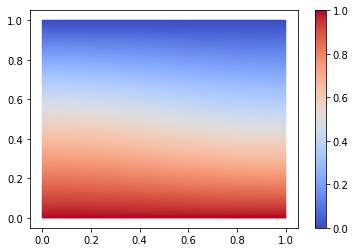

In [7]:
fig, axes = plt.subplots()
collection = tripcolor(Told, axes=axes, cmap='coolwarm')
fig.colorbar(collection);

Important constants in this problem (Rayleigh Number, Ra; viscosity, μ; thermal diffusivity, κ), in addition to the
constant timestep $\Delta t$ and unit vector $\hat{k}$, are next defined. We note that viscosity could also be a Function, if we
wanted spatial variation, and will return to this in part 2 of this notebook below.

In [8]:
Ra, mu, kappa, delta_t = Constant(1e4), Constant(1.0), Constant(1.0), Constant(1e-3)
k = Constant((0, 1)) 

We are now in a position to define the variational problems expressed in our weak formulation above.
We maintain the more general nonlinear residual form $F_{Stokes}(v, u) = 0$ and $F_{energy}(q, T)$ = 0, to allow
for straightforward extension to nonlinear problems. Here we provide the symbolic expressions for $F_{Stokes}$ and $F_{Energy}$ in UFL: the resemblance to the mathematical formulation is immediately apparent. Integration over the domain is indicated by multiplication with `dx`.

In [9]:
stress = 2 * mu * sym(grad(u))
F_stokes = inner(grad(v), stress) * dx - div(v) * p * dx - (dot(v, k) * Ra * Ttheta) * dx
F_stokes += -w * div(u) * dx  # Continuity equation
F_energy = q * (Tnew - Told) / delta_t * dx + q * dot(u, grad(Ttheta)) * dx + dot(grad(q), kappa * grad(Ttheta)) * dx

We specify strong Dirichlet boundary conditions for velocity (bcvx, bcvy) and temperature
(bctb, bctt). A Dirichlet boundary condition is created by constructing a Python
`DirichletBC` object, where the user must provide the
function space the condition applies to, the value, and the part of the mesh at
which it applies. 
Note how boundary conditions are being applied to the velocity part of the
mixed finite element space $Z$, indicated by `Z.sub(0)`. Within `Z.sub(0)` we can further subdivide into `Z.sub(0).sub(0)` and `Z.sub(0).sub(1)` to apply boundary conditions to the $x$ and $y$ components of the velocity field only. To apply conditions to the pressure space, we would use `Z.sub(1)`.

In [10]:
# Set up boundary conditions and deal with nullspaces:
bcvx, bcvy = DirichletBC(Z.sub(0).sub(0), 0, sub_domain=(left, right)), DirichletBC(Z.sub(0).sub(1), 0, sub_domain=(bottom, top))
bctb, bctt = DirichletBC(Q, 1.0, sub_domain=bottom), DirichletBC(Q, 0.0, sub_domain=top)

With closed boundaries, and no constraint on pressure anywhere in the domain, this problem has a constant pressure nullspace and we must
ensure that our solver removes this space. To do so, we build a nullspace
object, which will subsequently be passed to the solver, and PETSc will seek a solution in the space orthogonal to the provided nullspace. 

In [11]:
p_nullspace = MixedVectorSpaceBasis(Z, [Z.sub(0), VectorSpaceBasis(constant=True)])

We finally come to solving the variational problem, with associated solver objects. We pass in the residual functions
$F_{\text{Stokes}}$ and $F_{\text{Energy}}$, solution fields (z, $T_{\text{new}}$), boundary conditions and, for the Stokes system, the nullspace object. Solution of the two problems is undertaken by PETSc guided by the following solver parameters.

In [12]:
# Solver dictionary:
solver_parameters = {
    "mat_type": "aij",
    "snes_type": "ksponly",
    "ksp_type": "preonly",
    "pc_type": "lu",
    "pc_factor_mat_solver_type": "mumps",
}

# Setup problem and solver objects so we can reuse (cache) solver setup
stokes_problem = NonlinearVariationalProblem(F_stokes, z, bcs=[bcvx, bcvy])
stokes_solver = NonlinearVariationalSolver(stokes_problem, solver_parameters=solver_parameters, nullspace=p_nullspace, transpose_nullspace=p_nullspace)
energy_problem = NonlinearVariationalProblem(F_energy, Tnew, bcs=[bctb, bctt])
energy_solver = NonlinearVariationalSolver(energy_problem, solver_parameters=solver_parameters)

The first option, instructs the Jacobian to be assembled in PETSc's default `aij` sparse matrix type. Although the Stokes and energy problem in this example are linear, for consistency with more realistic cases, we use Firedrake's `NonlinearVariationalSolver` which makes use of PETSc's Scalable Nonlinear Equations Solvers (SNES) interface. However, since we do not actually need a nonlinear solver for this case, we choose the `ksponly` method, indicating that only a single linear solve needs to be performed. The linear solvers are configured through PETSc's Krylov Subspace (KSP) interface, where we can request a direct solver by choosing the `preonly` KSP method, in combination with `lu` as the preconditioner (PC) type. The specific implementation of the LU-decomposition based direct solver is selected as the MUMPS library. Note that the solution process is fully programmable, enabling the creation of sophisticated solvers by combining multiple layers of Krylov methods and preconditioners.

We can now initiate the time-loop, with the Stokes system solved seperately. These `solve` calls once again convert symbolic mathematics into computation. In the time loop, set here to run for 500 constant time-steps, we compute the RMS velocity and surface Nusselt number for diagnostic purposes, and print these results every 50 timesteps. 

In [13]:
no_timesteps = 500
for timestep in range(0, no_timesteps):
    stokes_solver.solve()
    energy_solver.solve()
    vrms = sqrt(assemble(dot(u, u) * dx)) * sqrt(1./assemble(1.*dx(domain=mesh)))
    nu_top = -1. * assemble(dot(grad(Tnew), FacetNormal(mesh)) * ds(top))
    if timestep % 50 == 0:
        print(timestep, vrms, nu_top)
    Told.assign(Tnew)
print(timestep, vrms, nu_top)

0 8.955611422461779 1.0068489594614247
50 42.7516261253631 4.005500389173811
100 44.68360737093354 4.937990661988601
150 43.09683906039719 4.933076993279187
200 42.851203681618216 4.90978478526935
250 42.85641186346002 4.906397189766447
300 42.86399663038686 4.906506587441135
350 42.86504372735901 4.9066170937883715
400 42.8649990841331 4.906631408767389
450 42.864963261072106 4.906630610892973
500 42.864958874042884 4.906630091748299
550 42.864959172426005 4.906630032325719
600 42.86495933997012 4.906630037301071
650 42.864959358022226 4.906630039716848
700 42.864959356240064 4.9066300399586105
750 42.86495935546373 4.906630039930007
800 42.86495935539109 4.9066300399188725
850 42.86495935540112 4.906630039917915
900 42.86495935540467 4.906630039918072
950 42.86495935540494 4.906630039918122


You will see that results converge towards as steady-state, over time.

# Exercises

### 1a: Plot the steady-state temperature field (Tnew), after completion of the 500 timesteps. 

Do you see a single convective cell? You should!

### 1b: Change your initial condition (remembering to keep it bounded between 0 and 1).

Do results converge towards the same solution? They should - this is a characteristic of low Rayleigh number Stokes flow. Verify that answers are consistent, even if the upwelling moves to the opposite side of the domain.

### 1c: Open this google sheet -- https://docs.google.com/spreadsheets/d/1P45xE0AOv6nkj2HmoXqOJvc0Yrgg4wjU9vSYW7wBLUA/edit?usp=sharing -- pick a resolution, place your name next to it, and run the case at that resolution. 

Add your steady-state Nusselt Number to the relevant column of the spreadsheet. As a group, you should find that results converge towards the benchmark solutions of Blankenbach et al. (1989), with increasing resolution. 

### 1d: Use a lower approximation degree for the temperature field (1) and re-run your cases. What do you notice?

Solve the same problem, only this time, use a piecewise linear approximation space for temperature. How do your results change? Is this as would be expected? 

- Hint: check the help for `FunctionSpace` to see how to specify the degree.

# Part II: variable viscosity flows

In the previous example, we considered isoviscous flows. This is not the case in the mantle, where the viscosity strongly depends on temperature, pressure, composition, strain-rate (non-linear) and potentially many other factors (e.g. grain size). In the second part of this notebook, we look at how straightforward it is to run a case where viscosity depends on temperature, depth and strain-rate -- a so-called visco-plastic rheology -- using a case from Tosi et al. (2015), a benchmark study intended to form a straightforward extension to Blankenbach et al. (1989). Indeed, aside from the viscosity and reference Rayleigh Number ($Ra_{0}=10^2$), all other aspects of this case are identical to the case presented above. 

The viscosity field, $\mu$, is calculated as the harmonic mean between a linear component, $\mu_{\text{lin}}$ (dependent on depth and temperature) and a nonlinear, plastic component, $\mu_{\text{plast}}$, which is dependent on the second invariant of the strain-rate, as follows:
$$
\mu(T,z,\dot \epsilon) = 2 \Biggl(\frac{1}{\mu_{\text{lin}(T,z)}} + \frac{1}{\mu_{\text{plast}(\dot\epsilon)}} \Biggr)^{-1}.
$$
The linear part is given by an Arrhenius law (the so-called Frank-Kamenetskii approximation):
$$
\mu_{\text{lin}(T,z)} = \exp(-\gamma_{T}T + \gamma_{z}z),
$$
where $\gamma_{T}=\ln(\Delta\mu_T)$ and $\gamma_{z}=\ln(\Delta\mu_z)$ are parameters controlling the total viscosity contrast due to temperature and depth, respectively. The nonlinear component is given by:
$$
\mu_{\text{plast}}(\dot\epsilon) = \mu^{\star} + \frac{\sigma_{y}}{\sqrt{\dot\epsilon : \dot\epsilon}}
$$
where $\mu^\star$ is a constant representing the effective viscosity at high stresses and $\sigma_{y}$ is the yield stress. The denominator of the second term represents the second invariant of the strain-rate tensor. The viscoplastic flow law leads to linear viscous deformation at low stresses and plastic deformation at stresses that exceed $\sigma_{y}$, with the decrease in viscosity limited by the choice of $\mu^\star$. 

Although Tosi et al. (2015) examined a number of cases, we focus on one here (Case 4: $Ra_{0}=10^2$, $\Delta\mu_T=10^5$, $\Delta\mu_{y}=10$ and $\mu^{\star}=10^{-3}$), which allows us to demonstrate how a temperature-, depth- and strain-rate dependent viscosity is incorporated within Firedrake. The changes required to simulate this case, relative to our base case are as follows.

1. Linear solver options are no longer applicable, given the dependence of viscosity on the flow field, through the strain-rate. Accordingly, the solver dictionary is updated to account for the nonlinear nature of our Stokes system. We exploit the SNES, using a setup based on Newton's method (`snes_type: newtonls`) with a secant line search over the L2-norm of the function (`snes_linesearch_type: l2`). As we target a steady-state solution, an absolute tolerance is specified for our nonlinear solver (`snes_atol: 1e-10`).
2. Solver options differ between the (nonlinear) Stokes and (linear) energy systems. As such, a separate solver dictionary is specified for solution of the energy equation. Consistent with our base case, we use a direct solver for solution of the energy equation, based on the MUMPS library. Both of these changes are shown below. 

In [ ]:
stokes_solver_parameters = {
    "mat_type": "aij",
    "snes_type": "newtonls",
    "snes_linesearch_type": "l2",
    "snes_max_it": 100,
    "snes_atol": 1e-10,
    "ksp_type": "preonly",
    "pc_type": "lu",
    "pc_factor_mat_solver_type": "mumps",
}
                                                                                                                                      
energy_solver_parameters = {
    "mat_type": "aij",
    "snes_type": "ksponly",
    "ksp_type": "preonly",
    "pc_type": "lu",
    "pc_factor_mat_solver_type": "mumps",
}

3. Viscosity is calculated as a function of temperature, depth ($\mu_{\text{lin}}$) and strain-rate ($\mu_{\text{plast}}$), using the constants specified. Linear and nonlinear components are subsequently combined via a harmonic mean. 

In [ ]:
Ra = Constant(100.) # Rayleigh number 
gamma_T, gamma_Z = Constant(ln(10**5)), Constant(ln(10))
mu_star, sigma_y = Constant(0.001), Constant(1.0)
epsilon = sym(grad(u))  # Strain-rate  
epsii = sqrt(inner(epsilon,epsilon) + 1e-15) # 2nd invariant (with tolerance to ensure stability)
mu_lin = exp(-gamma_T*Tnew + gamma_Z*(1 - X[1]))
mu_plast = mu_star + (sigma_y / epsii)
mu = (2. * mu_lin * mu_plast) / (mu_lin + mu_plast)

4. Updated solver dictionaries are incorporated into their respective solvers.

In [ ]:
stokes_solver = NonlinearVariationalSolver(stokes_problem, solver_parameters=stokes_solver_parameters, nullspace=p_nullspace, transpose_nullspace=p_nullspace)
energy_solver = NonlinearVariationalSolver(energy_problem, solver_parameters=energy_solver_parameters)

Putting all of this together, the entire script is as follows. 

In [20]:
mesh = UnitSquareMesh(30, 30, quadrilateral=True)
left, right, bottom, top = 1, 2, 3, 4  # Boundary IDs
dx = dx(degree=6)
V = VectorFunctionSpace(mesh, family="CG", degree=2)  # Velocity function space (vector)
W = FunctionSpace(mesh, family="CG", degree=1)  # Pressure function space (scalar)
Q = FunctionSpace(mesh, family="CG", degree=2)  # Temperature function space (scalar)
Z = MixedFunctionSpace([V, W])  # Mixed function space

v, w = TestFunctions(Z)
q = TestFunction(Q)
z = Function(Z)  # a field over the mixed function space Z.
u, p = split(z)  # returns symbolic UFL expression for u and p
Told, Tnew = Function(Q, name="OldTemp"), Function(Q, name="NewTemp")
Ttheta = 0.5 * Tnew + 0.5 * Told  # Temporal discretisation through Crank-Nicolson

X = SpatialCoordinate(mesh)
Told.interpolate(1.0 - X[1] + 0.05 * cos(pi * X[0]) * sin(pi * X[1]))
Tnew.assign(Told)

Ra, kappa, delta_t = Constant(100), Constant(1.0), Constant(1e-3)
k = Constant((0, 1))  # Unit vector (in direction opposite to gravity)

gamma_T, gamma_Z = Constant(ln(10**5)), Constant(ln(10))
mu_star, sigma_y = Constant(0.001), Constant(1.0)
epsilon = sym(grad(u))  # Strain-rate  
epsii = sqrt(inner(epsilon,epsilon) + 1e-15) # 2nd invariant (with tolerance to ensure stability)
mu_lin = exp(-gamma_T*Tnew + gamma_Z*(1 - X[1]))
mu_plast = mu_star + (sigma_y / epsii)
mu = (2. * mu_lin * mu_plast) / (mu_lin + mu_plast)

stress = 2 * mu * sym(grad(u))
F_stokes = inner(grad(v), stress) * dx - div(v) * p * dx - (dot(v, k) * Ra * Ttheta) * dx
F_stokes += -w * div(u) * dx  # Continuity equation
F_energy = q * (Tnew - Told) / delta_t * dx + q * dot(u, grad(Ttheta)) * dx + dot(grad(q), kappa * grad(Ttheta)) * dx

bcvx, bcvy = DirichletBC(Z.sub(0).sub(0), 0, sub_domain=(left, right)), DirichletBC(Z.sub(0).sub(1), 0, sub_domain=(bottom, top))
bctb, bctt = DirichletBC(Q, 1.0, sub_domain=bottom), DirichletBC(Q, 0.0, sub_domain=top)
p_nullspace = MixedVectorSpaceBasis(Z, [Z.sub(0), VectorSpaceBasis(constant=True)])

stokes_solver_parameters = {
    "mat_type": "aij",
    "snes_type": "newtonls",
    "snes_linesearch_type": "l2",
    "snes_max_it": 100,
    "snes_atol": 1e-10,
    "ksp_type": "preonly",
    "pc_type": "lu",
    "pc_factor_mat_solver_type": "mumps",
}
                                                                                                                                      
energy_solver_parameters = {
    "mat_type": "aij",
    "snes_type": "ksponly",
    "ksp_type": "preonly",
    "pc_type": "lu",
    "pc_factor_mat_solver_type": "mumps",
}

stokes_problem = NonlinearVariationalProblem(F_stokes, z, bcs=[bcvx, bcvy])
stokes_solver = NonlinearVariationalSolver(stokes_problem, solver_parameters=stokes_solver_parameters, nullspace=p_nullspace, transpose_nullspace=p_nullspace)
energy_problem = NonlinearVariationalProblem(F_energy, Tnew, bcs=[bctb, bctt])
energy_solver = NonlinearVariationalSolver(energy_problem, solver_parameters=energy_solver_parameters)

no_timesteps = 1000
for timestep in range(0, no_timesteps):
    stokes_solver.solve()
    energy_solver.solve()
    vrms = sqrt(assemble(dot(u, u) * dx)) * sqrt(1./assemble(1.*dx(domain=mesh)))
    nu_top = -1. * assemble(dot(grad(Tnew), FacetNormal(mesh)) * ds(top))
    if timestep % 50 == 0:
        print(timestep, vrms, nu_top)
    Told.assign(Tnew)
print(timestep, vrms, nu_top)

0 4.092042799552194 1.0003151275630584
50 150.47485947200633 10.387849839827762
100 82.55485618821425 7.533831598012
150 69.22533838207993 6.103437343692336
200 82.29745568754637 6.904681840997967
250 77.65762095235357 6.6787479864439785
300 79.4024946605788 6.753041688952606
350 78.89836388160248 6.738424782391851
400 79.06825409280577 6.743150543347095
450 79.0301791491131 6.743125915607748
500 79.0422647209803 6.743203656992681
550 79.04120182455709 6.743386729012577
600 79.0415924210325 6.743355487044413
650 79.04186879746699 6.743393209944025
700 79.04181780167885 6.743387889402323
750 79.04188747873872 6.743393361436549
800 79.04187597214592 6.74339295618239
850 79.04188675360008 6.743393632169313
900 79.04188560141715 6.743393654785564
950 79.04188696964816 6.743393732633158
999 79.04188695763396 6.74339374867242


# Exercises

### 2a: Plot the steady-state viscosity field. 

Note that you will need to create a field and interpolate values to that field, as the viscosity $\mu$ is currently only specified in UFL.

### 2b: Open this google sheet -- https://docs.google.com/spreadsheets/d/1P45xE0AOv6nkj2HmoXqOJvc0Yrgg4wjU9vSYW7wBLUA/edit?usp=sharing -- navigate to the "Tosi_Case" tab, pick a resolution, place your name next to it, and run the case at that resolution. 

Add your steady-state Nusselt Number to the relevant column of the spreadsheet. As a group, you should find that results converge towards the benchmark solutions of Tosi et al. (2015), with increasing resolution. 

### 2c: Increase the sensitivity of viscosity to temperature. 

What do you observe? 

